<a href="https://colab.research.google.com/github/MikeChastain84/Mike_INFO5731_Fall2024/blob/main/Chastain_Mike_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
# Mount google drive:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Write your code here

# We will use LDA. I chose LDA because it is a topic standard known for providing clear, interpretable
  # clusters with associated probabilities, making it ideal for summarizing the top 10 topics.

# Part 1: Features (text representation) used for topic modeling.
# Importing modules
import pandas as pd
import re

# Step 1: Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/INFO 5731/Week 14/sentiment_data.csv')

# Step 2: Preprocess the dataset
  # I realize the dataset was preprocessed but I want to be thorough:

# Remove punctuation
data['clean_text_processed'] = \
data['clean_text'].map(lambda x: re.sub('[,\.!?]', '', str(x)))

# Convert text to lowercase
data['clean_text_processed'] = \
data['clean_text_processed'].map(lambda x: x.lower())

# Print out the first rows:
print(data['clean_text_processed'].head())


0    nisei female born may selleck washington spent...
1    nisei male born june seattle washington grew a...
2    nisei female born october seattle washington f...
3    nisei female born july boyle heights californi...
4    sansei male born march torrance california gre...
Name: clean_text_processed, dtype: object


In [ ]:
# Step 3: Tokenization and Stopword Removal
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')  # Ensure stopwords are downloaded
stop_words = stopwords.words('english')  # Load default stopwords
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])  # Extend with custom stopwords

# Tokenize the text and remove stopwords
def sent_to_words(sentences):
    for sentence in sentences:
        # Tokenize and remove punctuation
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

def remove_stopwords(texts):
    # Remove stopwords from tokenized text
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Apply tokenization
data_words = list(sent_to_words(data['clean_text_processed'].values.tolist()))

# Apply stopword removal
data_words = remove_stopwords(data_words)

# Preview the processed text
print(data_words[:1][0][:30])  # Display the first 30 tokens from the first entry


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['nisei', 'female', 'born', 'may', 'selleck', 'washington', 'spent', 'much', 'childhood', 'beaverton', 'oregon', 'father', 'owned', 'farm', 'influenced', 'early', 'age', 'parents', 'conversion', 'christianity', 'world', 'war', 'ii', 'removed', 'portland', 'assembly', 'center', 'oregon', 'minidoka', 'concentration']


In [ ]:
# Create a dictionary and corpus
import gensim.corpora as corpora

# Step 4: Create a dictionary
# Each unique token in the dataset gets a unique ID
id2word = corpora.Dictionary(data_words)

# Step 5: Create a corpus
texts = data_words
# Convert the tokenized data into the bag-of-words format
# Each document is represented as a list of tuples (word_id, word_frequency)
corpus = [id2word.doc2bow(text) for text in texts]

# Step 6: Print some samples for verification
print("Sample Dictionary (word to ID):")
print(list(id2word.items())[:10])  # Print the first 10 words with their IDs

print("\nSample Corpus (document in bag-of-words format):")
print(corpus[:1])  # Print the bag-of-words representation of the first document

Sample Dictionary (word to ID):
[(0, 'age'), (1, 'assembly'), (2, 'beaverton'), (3, 'born'), (4, 'camp'), (5, 'center'), (6, 'childhood'), (7, 'christianity'), (8, 'concentration'), (9, 'conversion')]

Sample Corpus (document in bag-of-words format):
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 2), (37, 1), (38, 1)]]


In [ ]:
# Build and run the LDA model
from pprint import pprint

# Build LDA model
# number of topics
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       # I want unique consistency, so I set the random seed using my student ID.
                                       # This ensures my results are the same in case I have to rerun the code. ;-)
                                       random_state = 11804625)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.038*"camp" + 0.036*"california" + 0.023*"concentration" + 0.021*"born" + '
  '0.020*"war" + 0.019*"nisei" + 0.016*"removed" + 0.015*"world" + 0.015*"ii" '
  '+ 0.015*"grew"'),
 (1,
  '0.018*"camp" + 0.017*"born" + 0.017*"war" + 0.013*"seattle" + '
  '0.013*"washington" + 0.012*"nisei" + 0.012*"concentration" + '
  '0.011*"california" + 0.010*"world" + 0.010*"father"'),
 (2,
  '0.017*"california" + 0.016*"american" + 0.014*"camp" + 0.013*"japanese" + '
  '0.013*"born" + 0.010*"washington" + 0.009*"male" + 0.008*"war" + '
  '0.008*"angeles" + 0.007*"concentration"'),
 (3,
  '0.026*"war" + 0.023*"california" + 0.021*"camp" + 0.019*"born" + '
  '0.019*"world" + 0.018*"ii" + 0.015*"male" + 0.015*"concentration" + '
  '0.015*"nisei" + 0.012*"family"'),
 (4,
  '0.018*"war" + 0.018*"california" + 0.017*"born" + 0.014*"nisei" + '
  '0.013*"ii" + 0.013*"los" + 0.013*"world" + 0.012*"camp" + 0.011*"angeles" + '
  '0.009*"washington"'),
 (5,
  '0.021*"camp" + 0.017*"war" + 0.017*"born" +

In [ ]:
# !pip install pyLDAvis -q

In [ ]:
#import pyLDAvis.gensim

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(LDAvis_prepared)

## pyLDAvis Interpretation:
*Note: Topic 0 - 9 are represented as 1 - 10 in the visualization above. I will refer to them as they are represented in the code output, topics 0-9.*

The Intertopic Distance Map on the left demonstrates how similar or disimilar the topics are with one another based on the distance between them. Each circle represents a topic, and its size indicates the prevalence of the topic in the dataset.

The visualization provides an interactive way to explore the relationship between topics and keywords of topics.

The map validates the distinctiveness of topics and offers insight into their semantic structure.

## **Summary and description of the topic for each cluster (0 - 9).**


**Topic 0**:
Summary: This topic focuses on the experiences of individuals in camps located in California, their displacement, and their lives during World War II, with an emphasis on movements and events such as "being removed" or "growing up" during that time.

**Topic 1**:
Summary: This topic focuses on personal stories centered on Seattle, Washington, and individuals' family dynamics during the war, including connections to camps and the role of fathers.

**Topic 2**:
Summary: This topic focuses on Japanese-American identity, focusing on their lives in California and Washington, interactions with American society, and the presence of Japanese culture during the war.

**Topic 3**:
Summary: This topic focuses on general wartime experiences, including displacement to camps, familial roles, and life in California during World War II, with an emphasis on nisei males and their families.

**Topic 4**:
Summary: This topic focuses on the lives of individuals in Los Angeles, their experiences during the war, and how their displacement impacted both family and community life, often focusing on nisei individuals.

**Topic 5**:
Summary: This topic focuses on experiences in camps in California and Washington, focusing on Japanese families and the societal dynamics during the war.

**Topic 6**:
Summary: This topic focuses on life in California during World War II, including concentration camps, nisei individuals, and broader themes of displacement and resilience.

**Topic 7**:
Summary: This topic focuses on the lives of individuals in Washington state, with mentions of Seattle, Japanese-American communities, and their wartime experiences.

**Topic 8**:
Summary: This topic focuses on individuals' experiences in California camps, emphasizing displacement, World War II, and nisei females' stories of resilience and survival.

**Topic 9**:
Summary: This topic focuses on Japanese-American communities in Washington and Seattle, with a focus on education, local culture, and community-building efforts during the war.


## Final Notes:
LDA provided valuable insights into the dataset by uncovering recurring themes and patterns within the narratives. By analyzing the top 10 clusters, it became evident that topics such as concentration camps, familial roles, Japanese-American identity, and community contributions were central to the dataset. This process helped connect the topics to real-world historical and social contexts, making it easier to interpret the human experiences embedded in the text.

For this task, I chose the bag-of-words representation as the feature for topic modeling. This approach is well-suited for identifying patterns and clusters in textual data because it simplifies the representation of documents into a numerical format. While bag-of-words does not capture word order or semantics, it works effectively with LDA to identify co-occurring terms and latent topics. This method was appropriate for the dataset because it allowed for the discovery of broad themes and associations without requiring advanced semantic understanding.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

## ***Imbalance Concern:***

I manually labeled 300 / 991 entries using ChatGPT.
However, look at how the labels are distributed:

negative - 15

positive - 82

neutral - 204

Clearly, the dataset is highly imbalanced.

## **Question 2 Part 1:**
"Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation."

## Response:
For sentiment classification, I have selected the TF-IDF (Term Frequency-Inverse Document Frequency) representation of the text data in the clean_text_processed column as the feature.

TF-IDF improves upon the Bag-of-Words (BoW) approach by not only considering the presence or absence of words but also weighting words based on their importance in the dataset. Words that appear frequently in many documents (e.g., "the," "and") are downweighted, while words that are unique to specific documents (e.g., "great," "terrible") are given higher importance.

This makes TF-IDF particularly effective for sentiment classification because it emphasizes words that are likely to carry sentiment information, such as "amazing" or "horrible," while reducing the impact of common, less informative words.

In [ ]:
# Write your code here
# I will first split the data into training (80%) and testing (20%).
from sklearn.model_selection import train_test_split

# Filter out rows where the sentiment label is NaN
labeled_data = data.dropna(subset=['sentiment'])

# Assuming `clean_text_processed` contains the preprocessed text and `sentiment` is the label
X = labeled_data['clean_text_processed']  # Features (text data)
y = labeled_data['sentiment']  # Labels (sentiment: positive, negative, neutral)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes to verify
print("Training data size:", len(X_train))
print("Testing data size:", len(X_test))

Training data size: 240
Testing data size: 60


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Training data size: 240**

**Testing data size: 60**

That's not a lot of data, but I think cross-validation will help to some extent by making better use of the available labeled data.

## Question 2 Part 2:

SVM and Logistic Regression using 5-fold cross-validation

In [ ]:
# SVM

# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Create a pipeline with TF-IDF and SVM Classifier
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=2)),  # TF-IDF vectorization
                                                                 # min_df was adjusted to 2 to retain more features.
    ('clf', SVC(kernel='linear', class_weight='balanced', random_state=42)),  # SVM Classifier with a linear kernel
])                                                                              # class_weight balanced to help with with
                                                                                  # imbalanced dataset mentioned above

# Step 2: Perform 10-fold cross-validation on the training set
cv_scores = cross_val_score(text_clf, X_train, y_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Step 3: Train the model on the full training set
text_clf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = text_clf.predict(X_test)

# Step 5: Evaluate the model on the test set
# Print the classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Print the model accuracy on the test set
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Scores: [0.66666667 0.70833333 0.79166667 0.83333333 0.5        0.58333333
 0.75       0.83333333 0.79166667 0.625     ]
Mean CV Accuracy: 0.7083333333333334

Classification Report on Test Set:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.67      0.89      0.77        35
    positive       0.54      0.37      0.44        19

    accuracy                           0.63        60
   macro avg       0.40      0.42      0.40        60
weighted avg       0.56      0.63      0.59        60

Test Set Accuracy: 0.6333333333333333


**I researched and tried some ideas. Using SMOTE and an imbalanced pipline didn't help my score in the output above so I removed them. Lets see how Logistic Regression does in comparison.**

In [ ]:
# Logistic Regression

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Step 1: Create a pipeline with TF-IDF and Logistic Regression Classifier
logreg_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=2)),  # TF-IDF vectorization
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)),  # Logistic Regression
])

# Step 2: Perform 10-fold cross-validation on the training set
cv_scores_logreg = cross_val_score(logreg_clf, X_train, y_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores (Logistic Regression):", cv_scores_logreg)
print(f"Mean CV Accuracy (Logistic Regression): {cv_scores_logreg.mean()}")

# Step 3: Train the model on the full training set
logreg_clf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred_logreg = logreg_clf.predict(X_test)

# Step 5: Evaluate the model on the test set
# Print the classification report
print("\nClassification Report on Test Set (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

# Print the model accuracy on the test set
print(f"Test Set Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_logreg)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Scores (Logistic Regression): [0.58333333 0.70833333 0.75       0.79166667 0.625      0.58333333
 0.66666667 0.83333333 0.625      0.625     ]
Mean CV Accuracy (Logistic Regression): 0.6791666666666666

Classification Report on Test Set (Logistic Regression):
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.66      0.77      0.71        35
    positive       0.39      0.37      0.38        19

    accuracy                           0.57        60
   macro avg       0.35      0.38      0.36        60
weighted avg       0.51      0.57      0.53        60

Test Set Accuracy (Logistic Regression): 0.5666666666666667


In [ ]:
"""
Metric	                SVM	    Logistic Regression

Accuracy	              0.63	  0.57

Macro Avg Precision	    0.40	  0.35

Macro Avg Recall	      0.42	  0.38

Macro Avg F1-Score	    0.40	  0.36

Weighted Avg Precision	0.56	  0.51

Weighted Avg Recall	    0.63	  0.57

Weighted Avg F1-Score	  0.59	  0.53
"""

**Log Regression and SVM Comparison**

The results indicate that Logistic Regression underperforms compared to SVM in sentiment classification on this dataset:

Accuracy: Logistic Regression achieved 57% accuracy, lower than SVM's 63%. This demonstrates SVM's better generalization to unseen data.

Precision, Recall, and F1-Score: Logistic Regression shows lower precision, recall, and F1-scores across all classes. This suggests it struggles to handle the imbalanced dataset effectively, particularly for the minority classes (negative and positive).

Class Distribution Impact: Both models perform better on the neutral class, which dominates the dataset. SVM demonstrates a slight improvement in predicting the positive class compared to Logistic Regression.

Dataset Imbalance: The primary challenge is the imbalanced dataset, where the minority class (negative) is severely underrepresented. This limitation stems from issues encountered in a previous assignment, which impacted the labeling process.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Exploratory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

## **Inspect Datasets:**

*Disclaimer: I am not a real estate agent or broker. I think some of the decisions I make below will be flawed for this reason.*

In [119]:
# Write your code here
import pandas as pd

train_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/INFO 5731/Week 14/assignment4-question3-data/train.csv')
test_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/INFO 5731/Week 14/assignment4-question3-data/test.csv')

# Inspect data:
print('Train Data:')
print(train_data.head())
print('\nTest Data:')
print(test_data.head())


Train Data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008 

## **Cleaning and Preprocessing**
### Handling missing values:



In [120]:
import numpy as np
from sklearn.impute import SimpleImputer

# Drop columns that are mostly missing features, just add noise, and/or don't contribute much to the sells price:
    # 'Id' is only dropped from train dataset, not test dataset. It doesn't contribute to the training of a model
        # but we need it to identify homes after testing the model.
train_data = train_data.drop(columns=['Id', 'Alley', 'Utilities', 'MiscFeature', 'PoolQC', 'Fence', 'Condition2',
                                      'MasVnrType', 'FireplaceQu', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
                                      'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                      'BsmtFullBath', 'BsmtHalfBath', 'GarageType', 'GarageYrBlt', 'GarageFinish',
                                      'GarageQual', 'GarageCond', 'GarageArea'])
test_data = test_data.drop(columns=['Alley', 'Utilities', 'MiscFeature', 'PoolQC', 'Fence', 'Condition2',
                                    'MasVnrType', 'FireplaceQu', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
                                    'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
                                    'BsmtHalfBath', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageArea'])

# Note for basements and garages:
    # I left BsmtCond and GarageCars, but deleted the other features with a lot of missing values for garages and basements.
    # These are the most important features related to garages and basements and
    # I expect the others to have multicollinearity with BsmtCond or GarageCars anyways.

# Imputation for training data
# MasVnrArea: Fill missing values with 0
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)

# Electrical: Fill missing values with the most frequent value
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])

# Replace missing values in BsmtCond with 'NA'
train_data['BsmtCond'] = train_data['BsmtCond'].fillna('NA')

# Imputation for testing data
# MSZoning: Fill missing values with the most frequent value
test_data['MSZoning'] = test_data['MSZoning'].fillna(train_data['MSZoning'].mode()[0])

# Exterior1st: Fill missing values with the most frequent value
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])

# Exterior2nd: Fill missing values with the most frequent value
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(train_data['Exterior2nd'].mode()[0])

# Replace missing values in BsmtCond with 'NA'
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('NA')

# MasVnrArea: Fill missing values with 0
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

# KitchenQual: Fill missing values with the most frequent value
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(train_data['KitchenQual'].mode()[0])

# Functional: Fill missing values with the most frequent value
test_data['Functional'] = test_data['Functional'].fillna(train_data['Functional'].mode()[0])

# SaleType: Fill missing values with the most frequent value
test_data['SaleType'] = test_data['SaleType'].fillna(train_data['SaleType'].mode()[0])

# Impute missing values for GarageCars with the mean value
test_data['GarageCars'] = test_data['GarageCars'].fillna(train_data['GarageCars'].mean())

# Lot frontage will probably contribute to the sells price as it correlates with the size of a lot,
    # so we will treat this feature a little different.
    # Homes typically have frontage along the connecting street.
    # These values are most likely just missing, so we will impute the average for that feature.
# First, replace 'NA' strings with NaN
train_data['LotFrontage'] = train_data['LotFrontage'].replace('NA', np.nan)
test_data['LotFrontage'] = test_data['LotFrontage'].replace('NA', np.nan)

# Next, impute the average for LotFrontage into the newly NaN cells
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(train_data['LotFrontage'].median())  # Use training median for consistency



In [121]:
# Check for missing values in the training data
missing_values_train = train_data.isnull().sum()
print("Missing values in training data:")
print(missing_values_train[missing_values_train > 0])

# Check for missing values in the testing data
missing_values_test = test_data.isnull().sum()
print("\nMissing values in testing data:")
print(missing_values_test[missing_values_test > 0])

Missing values in training data:
Series([], dtype: int64)

Missing values in testing data:
Series([], dtype: int64)


In [122]:
print(train_data.head)
print(test_data.head)

<bound method NDFrame.head of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     LotConfig LandSl

In [123]:
# Categorical vs Numerical Features:
categorical_features = train_data.select_dtypes(include=['object']).columns
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtCond', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Features: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


Encoding:

In [124]:
# Using One-hot encoding to convert categorical data to numerical data:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Step 1: Separate features and target
X_train = train_data.drop(columns=['SalePrice'])  # All features except the target
y_train = train_data['SalePrice']  # Target variable

# Step 2: Identify categorical and numerical columns
categorical_features = list(X_train.select_dtypes(include=['object']).columns)
numerical_features = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

# Step 3: Create ColumnTransformer to handle categorical encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Step 4: Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)  # Apply the transformations to the training data
X_test_transformed = preprocessor.transform(test_data)  # Apply the same transformations to the test data

# Step 5: Check the shapes of the transformed data
print(f"Training Data Shape: {X_train_transformed.shape}")
print(f"Test Data Shape: {X_test_transformed.shape}")


Training Data Shape: (1460, 210)
Test Data Shape: (1459, 210)


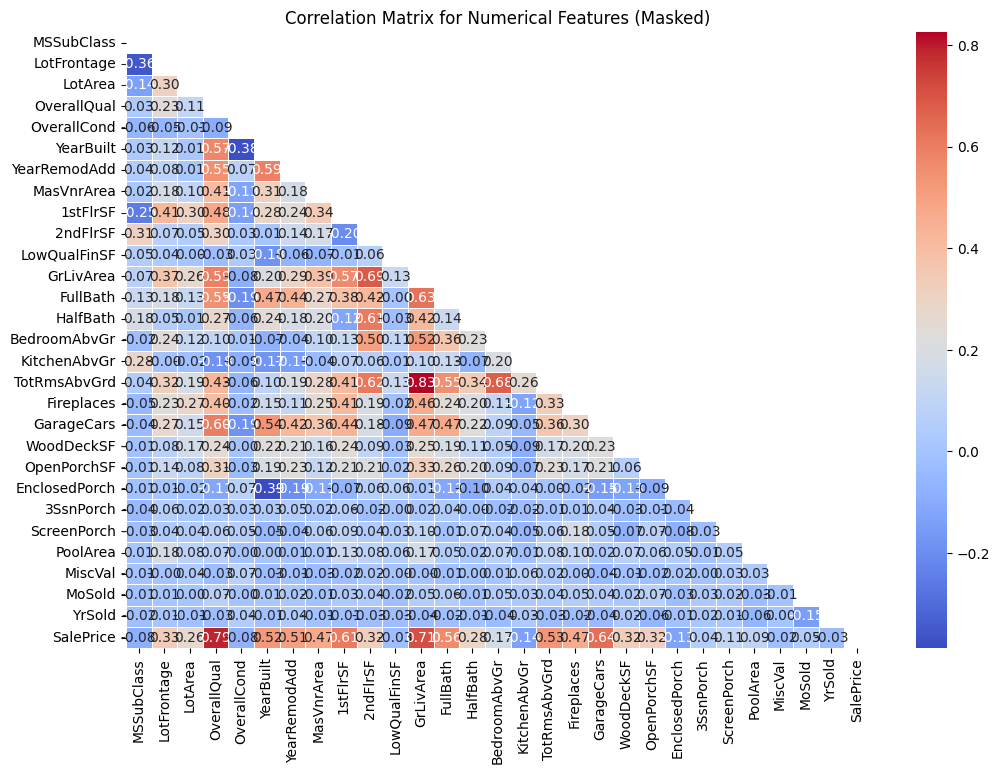

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numerical columns
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix for numerical features
correlation_matrix = train_data[numerical_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title("Correlation Matrix for Numerical Features (Masked)")
plt.show()

### **10 Features selected based on correlation or knowledge of real estate:**

**Highly Correlated Features:** We can now easily identify features with strong correlations to the target variable SalePrice.

OverallQual (0.79) - The strongest positive correlation; measures overall material and finish quality.

GrLivArea (0.71) - Total above-ground living area; highly correlated with house price.

GarageCars (0.64) - Number of cars that can fit in the garage; an important practical feature.

1stFlrSF (0.61) - Size of the first floor; contributes to the total living space.

FullBath (0.56) - Number of full bathrooms; important for usability.

TotRmsAbvGrd (0.53) - Total rooms above ground level; reflects house size and layout.

YearBuilt (0.52) - The year the house was built; newer homes tend to have higher prices.

**Intuition and knowledge regarding real estate and some of the categorical features:** I chose to include these categorical features due to their importance in real estate.

Neighborhood - Location, essential in real estate

ExterQual - External quality likely impacts price

KitchenQual - Kitchen quality is important for buyers

### **Rationale for Feature Selection**
**High Correlation:** Features like OverallQual and GrLivArea were selected due to their strong positive correlation with SalePrice, making them reliable predictors.

**Practical Importance:** Categorical features like Neighborhood and KitchenQual were chosen based on their known significance in real estate valuation.

**Diverse Representation:** A mix of numerical and categorical features ensures the model captures various aspects of home valuation.

**Avoiding Multicollinearity:** Features with redundant information (e.g., GarageArea) were excluded to avoid overfitting.

## Part 3:

In [126]:
# Selected features (from Part 2)
selected_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'FullBath',
    'TotRmsAbvGrd', 'YearBuilt', 'Neighborhood', 'ExterQual', 'KitchenQual'
]

# Identify the one-hot encoded columns for categorical features
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine numerical and one-hot encoded feature names
transformed_feature_names = list(encoded_columns) + numerical_features

# Identify indices of the selected features in the transformed dataset
# (Match both numerical and one-hot encoded categorical features)
selected_feature_indices = [
    i for i, col in enumerate(transformed_feature_names)
    if col in selected_features or any(feature in col for feature in selected_features)
]

# Filter transformed training and testing data
X_train_selected = X_train_transformed[:, selected_feature_indices]
X_test_selected = X_test_transformed[:, selected_feature_indices]

# Check shapes to confirm filtering
print(f"Selected Training Data Shape: {X_train_selected.shape}")
print(f"Selected Test Data Shape: {X_test_selected.shape}")

Selected Training Data Shape: (1460, 40)
Selected Test Data Shape: (1459, 40)


*This output indicates that the feature selection process was successful and that only the 40 columns corresponding to the 10 selected features (including their one-hot encoded categories) are being used. This aligns with our intention to include only the most relevant features in the regression model.*

In [127]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Perform cross-validation on the selected training data
cv_rmse = np.sqrt(-cross_val_score(model, X_train_selected, y_train, cv=10, scoring='neg_mean_squared_error'))
print(f"Cross-Validation RMSE: {cv_rmse.mean()}")

# Train the model on the selected training data
model.fit(X_train_selected, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(X_train_selected)  # Use X_train_selected here
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training RMSE: {train_rmse}")
print(f"Training R^2 Score: {train_r2}")

Cross-Validation RMSE: 33470.17471170908
Training RMSE: 32912.97151367163
Training R^2 Score: 0.8282384641248024


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [130]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict house prices for the test set
test_predictions = model.predict(X_test_selected)

# Save the predictions to a DataFrame for easy viewing
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})

# Display a preview of the predictions
print(output.head())

# Save to a CSV file
output.to_csv('house_price_predictions.csv', index=False)

     Id  SalePrice
0  1461  109971.25
1  1462  157901.00
2  1463  164574.00
3  1464  184961.00
4  1465  252859.50


**I can't figure out how to evaluate the model on the test set since it doesn't  have a sales price. I am out of time and will come back to this on another date. I am sorry I did not finish the assignment.**

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


## **Part 1:**

**Model Chosen:** RoBERTa (Robustly Optimized BERT Pretraining Approach)

For this assignment, I chose RoBERTa because it is a robust and widely-used PLM that has been proven to perform well on various NLP tasks, including sentiment analysis.

Pretraining Data: RoBERTa was trained on a huge amount of text data, which makes it powerful for understanding and processing natural language. The main datasets it was trained on include:

BooksCorpus: A dataset with around 800 million words.
English Wikipedia: Contains 2.5 billion words.
OpenWebText: About 38GB of web content similar to Reddit discussions.
CC-News: A collection of 63 million English news articles.
Common Crawl Stories: Another 31GB of text from online stories.
Number of Parameters: RoBERTa has different versions depending on the size of the model:

RoBERTa-base: 125 million parameters.
RoBERTa-large: 355 million parameters. For this task, I'll be using RoBERTa-base because it's computationally efficient and works well for zero-shot tasks like sentiment analysis.
Fine-Tuning: RoBERTa isn't fine-tuned for specific tasks during its pretraining phase. However, there are versions available that are fine-tuned for tasks like sentiment analysis. For this assignment, I will use RoBERTa in a zero-shot setting, which means I'll use it directly without training it on my specific dataset.

## **Part 2:**

In [ ]:
# Write your code here

# Import necessary libraries
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load the dataset
dataset_path = '/content/gdrive/MyDrive/Colab Notebooks/INFO 5731/Week 11/sentiment_data.csv'
data = pd.read_csv(dataset_path)

# Prepare the data
texts = data['clean_text'].tolist()
ground_truths = data['sentiment'].tolist()

# Initialize the zero-shot classification pipeline using RoBERTa
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define candidate labels for sentiment
candidate_labels = ["positive", "neutral", "negative"]

# Perform zero-shot classification
predictions = []
for text in texts:
    result = classifier(text, candidate_labels)
    predicted_label = result['labels'][0]  # The top predicted label
    predictions.append(predicted_label)

# Map predictions and ground truths to numerical values for evaluation
label_mapping = {"positive": 1, "neutral": 0, "negative": -1}

# Convert labels to numerical values
predictions_numeric = [label_mapping[label] for label in predictions]
ground_truths_numeric = [label_mapping[label] for label in ground_truths]

# Evaluate performance
accuracy = accuracy_score(ground_truths_numeric, predictions_numeric)
precision = precision_score(ground_truths_numeric, predictions_numeric, average='weighted', zero_division=0)
recall = recall_score(ground_truths_numeric, predictions_numeric, average='weighted', zero_division=0)
f1 = f1_score(ground_truths_numeric, predictions_numeric, average='weighted', zero_division=0)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## **Part 3: Advantages, Disadvantages, and Challenges of Using RoBERTa**

RoBERTa offers several advantages for sentiment analysis tasks. Its pretraining on large and diverse datasets enables strong generalization across various NLP tasks, including zero-shot classification. This eliminates the need for additional fine-tuning, saving time and resources while maintaining reasonable performance. Additionally, its integration with Hugging Face's transformers library makes it easy to implement, even for users with minimal experience.

However, RoBERTa has its limitations. Its large size and computational intensity can make it challenging to use on large datasets or without access to powerful hardware, such as GPUs. Zero-shot classification, while convenient, often falls short of the accuracy achieved by fine-tuned models, especially on domain-specific datasets. RoBERTa is also sensitive to input formatting, requiring careful preprocessing to achieve consistent results.

During implementation, several challenges arose. Running the model on 500+ entries was time-intensive, highlighting its computational demands. I chose to submit the assigment while the code was running.

Overall, RoBERTa is a robust choice for zero-shot sentiment analysis when fine-tuning is not an option and time is no concern. While it is computationally demanding and less accurate for domain-specific tasks, it is an excellent tool for exploratory analysis and general sentiment classification.